In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import string 
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS

from plotly.offline import iplot

from sklearn.feature_extraction.text import TfidfVectorizer


from imblearn.combine import SMOTETomek
nltk.download('vader_lexicon', quiet=True);

from sklearn import decomposition
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
data = pd.read_excel('Womens Clothing Reviews Data.xlsx')

In [3]:
data

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


## EDA

### a. Performing exploratory analysis on the data to understand the patterns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [5]:
data.columns = data.columns.str.replace(' ','_')

In [6]:
data.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [7]:
## checking duplicates 

data.duplicated().sum()

3

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
## removing columns 

data.drop(columns = ['Product_ID','Review_Title'], inplace = True)

In [10]:
## checking missing values 

data.isna().sum()

Category           14
Subcategory1       14
SubCategory2       14
Location            0
Channel             0
Customer_Age        0
Review_Text       842
Rating              0
Recommend_Flag      0
dtype: int64

In [11]:
data.dropna(inplace= True)

In [12]:
data.nunique()

Category              3
Subcategory1          6
SubCategory2         20
Location              4
Channel               2
Customer_Age         77
Review_Text       22621
Rating                5
Recommend_Flag        2
dtype: int64

In [13]:
data.Recommend_Flag.value_counts()


## higly skewed distribution 

1    18527
0     4101
Name: Recommend_Flag, dtype: int64

<Axes: xlabel='Recommend_Flag', ylabel='count'>

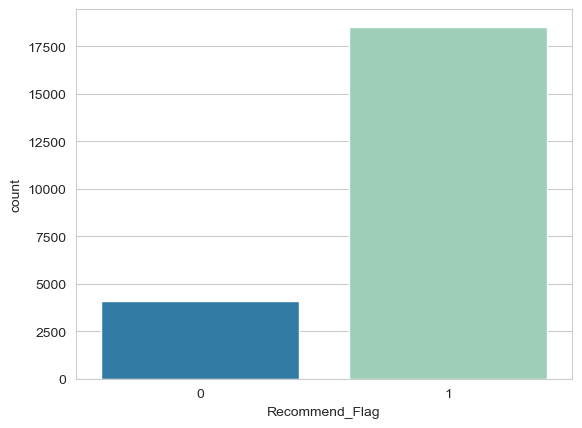

In [14]:
sns.set_style('whitegrid')
sns.countplot(data = data, x = 'Recommend_Flag',palette='YlGnBu_r')

In [15]:
data.Customer_Age.unique()

array([33, 34, 60, 50, 47, 49, 39, 24, 53, 44, 41, 32, 55, 31, 28, 46, 21,
       36, 65, 29, 38, 59, 40, 23, 67, 48, 43, 52, 56, 66, 61, 57, 58, 37,
       27, 62, 68, 51, 83, 69, 54, 63, 71, 30, 64, 42, 35, 22, 26, 72, 25,
       45, 74, 70, 20, 80, 93, 82, 77, 85, 73, 78, 79, 19, 76, 84, 75, 89,
       81, 90, 94, 86, 99, 18, 91, 87, 92], dtype=int64)

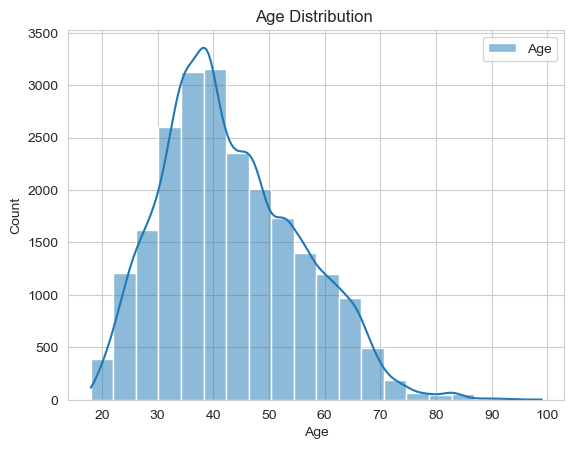

In [16]:
sns.histplot(data = data, x = 'Customer_Age',bins= 20, kde = True, palette='YlGnBu_r',label = "Age")
#sns.set_style('whitegrid')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution ")
plt.show()

In [17]:
data.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1


<Axes: xlabel='Category', ylabel='count'>

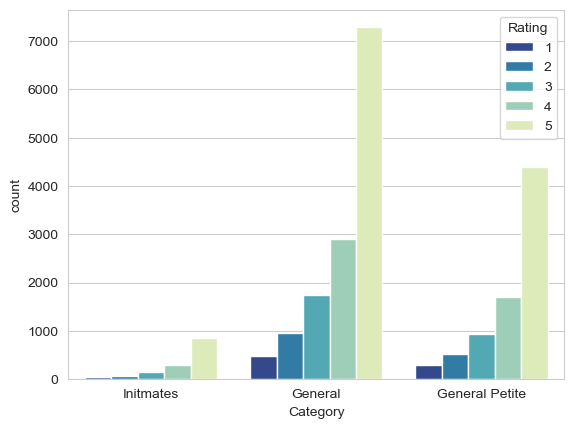

In [18]:
sns.countplot(data = data, x = 'Category',palette='YlGnBu_r', hue = 'Rating')

<Axes: xlabel='Subcategory1', ylabel='count'>

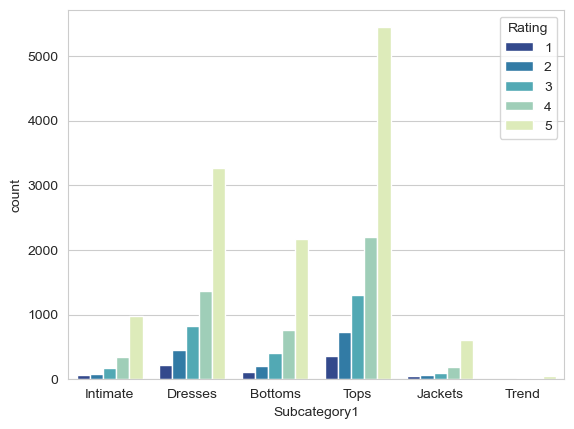

In [19]:
sns.countplot(data = data, x = 'Subcategory1',palette='YlGnBu_r', hue ='Rating')

<Axes: xlabel='Location', ylabel='count'>

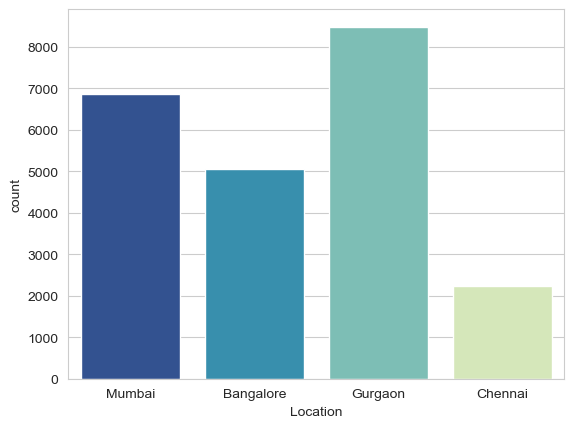

In [20]:
sns.countplot(data = data, x = 'Location',palette='YlGnBu_r')

<Axes: xlabel='Location', ylabel='count'>

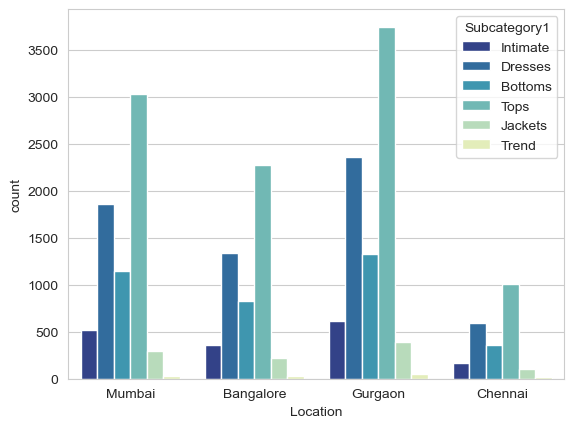

In [21]:
sns.countplot(data = data, x = 'Location',palette='YlGnBu_r', hue ='Subcategory1')

<Axes: xlabel='Location', ylabel='count'>

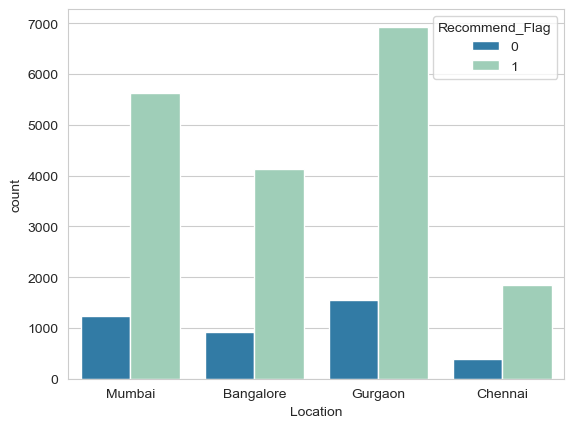

In [22]:
sns.countplot(data = data, x = 'Location',palette='YlGnBu_r', hue ='Recommend_Flag')

<Axes: xlabel='Subcategory1', ylabel='count'>

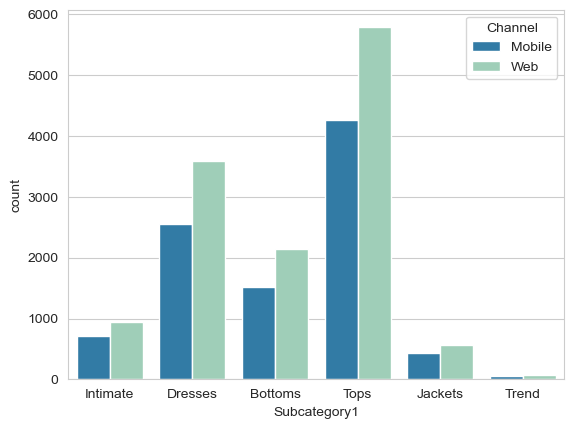

In [23]:
sns.countplot(data = data, x = 'Subcategory1',palette='YlGnBu_r', hue ='Channel')

<Axes: xlabel='Recommend_Flag', ylabel='count'>

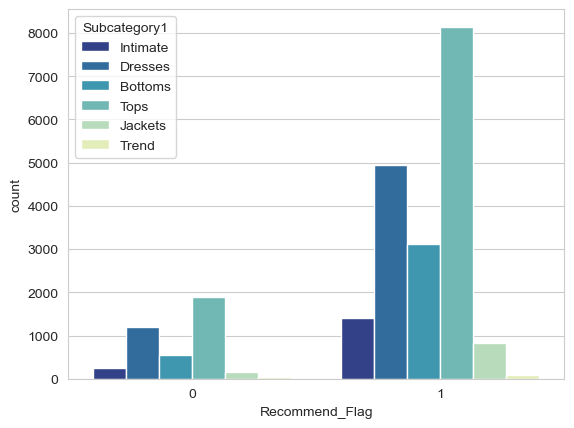

In [24]:
sns.countplot(data = data, x = 'Recommend_Flag',palette='YlGnBu_r', hue ='Subcategory1')

### b. Perform text mining tasks to understand what most frequent words are using for positive sentiment and negative sentiment. Create word clouds for the positive & negative reviews separately.

#### Text Processing

In [25]:
data.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1


In [26]:
# Function to clean the text
def preProcessing(review):
    text = review.lower()
    
    # tokenize the text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    text = RegexpTokenizer(r'\w+').tokenize(str(text))
    
    # remove stop words
    text = [x for x in text if x not in stopwords.words('english')]
    
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # join all
    review_clean = " ".join(text)
    return(review_clean)

In [27]:
data['Review_Clean'] = data['Review_Text'].apply(lambda x: preProcessing(x))

In [28]:
data.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag,Review_Clean
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1,absolutely wonderful silky sexy comfortable
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1,love dress sooo pretty happened find store gla...
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0,high hopes dress really wanted work initially ...
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,love love love jumpsuit fun flirty fabulous ev...
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1,shirt flattering due adjustable front tie perf...


In [29]:
SIA = SentimentIntensityAnalyzer()

# Applying Model, Variable Creation
data['Polarity_Score']=data["Review_Clean"].apply(lambda x:SIA.polarity_scores(x)['compound'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
data['Sentiment']=''
data.loc[data['Polarity_Score']>0,'Sentiment']='Positive'
data.loc[data['Polarity_Score']==0,'Sentiment']='Neutral'
data.loc[data['Polarity_Score']<0,'Sentiment']='Negative'

In [30]:
df = data[['Review_Text','Review_Clean','Polarity_Score','Sentiment']]

In [31]:
df

,Review_Text,Review_Clean,Polarity_Score,Sentiment
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable,0.8991,Positive
1,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store gla...,0.9710,Positive
2,I had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...,0.9062,Positive
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...,0.9464,Positive
4,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...,0.9062,Positive
...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,happy snag dress great price easy slip flatter...,0.8979,Positive
23482,"It reminds me of maternity clothes. soft, stre...",reminds maternity clothes soft stretchy shiny ...,0.7579,Positive
23483,"This fit well, but the top was very see throug...",fit well top see never would worked glad able ...,0.7918,Positive
23484,I bought this dress for a wedding i have this ...,bought dress wedding summer cute unfortunately...,0.9371,Positive


Positive: 21861
Negative: 617
Neutral: 150


<Axes: xlabel='Sentiment', ylabel='count'>

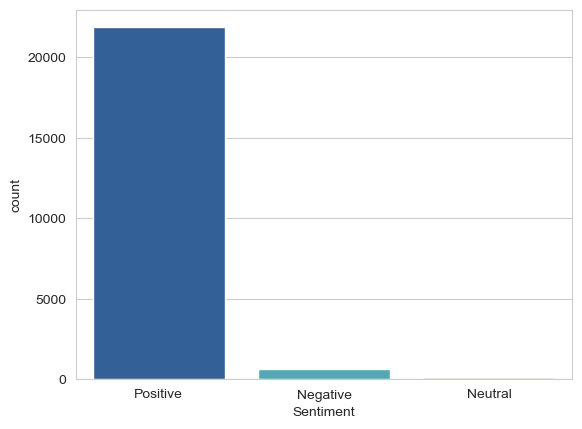

In [32]:
target_count = df['Sentiment'].value_counts()
print("Positive:",  target_count[0])
print("Negative:",  target_count[1])
print("Neutral:",  target_count[2])

sns.countplot(x = 'Sentiment',data = df,palette='YlGnBu_r')

#### Word cloud of the positive and negatives words

In [33]:
stop_words = set(STOPWORDS)
stop_words.update([x.lower() for x in list(data["SubCategory2"][data["SubCategory2"].notnull()].unique())] + ["dress", "petite", "skirt","shirt"])

In [34]:
def wordCloud(data, background_color, title):
    plt.figure(figsize = (10,10))
    wc = WordCloud(background_color = background_color, max_words = 500, stopwords = stop_words, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')

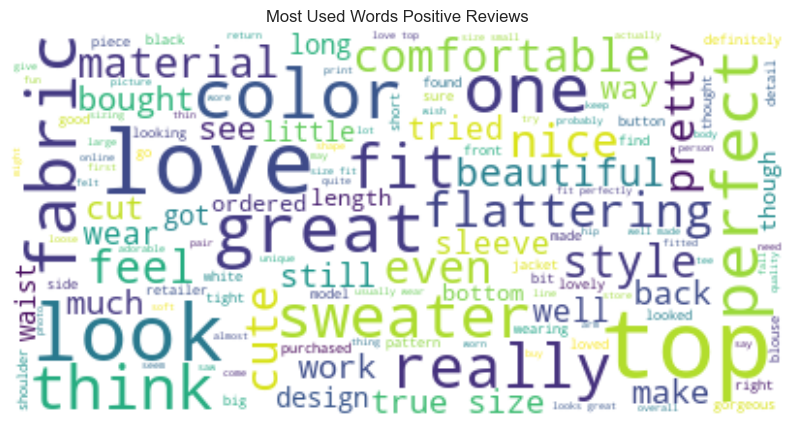

In [35]:
positive_reviews = df[df['Sentiment'] == 'Positive']
wordCloud(positive_reviews['Review_Clean'], 'white', "Most Used Words Positive Reviews")

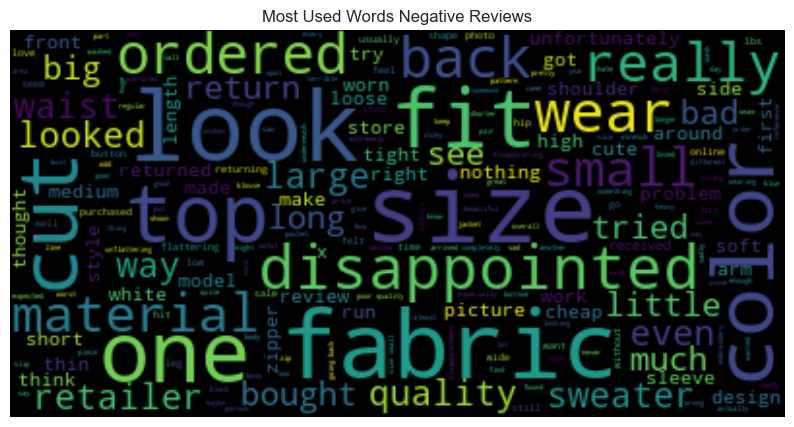

In [36]:
negative_reviews = df[df['Sentiment'] == 'Negative']
wordCloud(negative_reviews['Review_Clean'], 'black', "Most Used Words Negative Reviews")

### c. Understand sentiment among the customers on the different categories, sub categories,products by location and age group

In [37]:
data.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag,Review_Clean,Polarity_Score,Sentiment
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1,absolutely wonderful silky sexy comfortable,0.8991,Positive
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1,love dress sooo pretty happened find store gla...,0.9710,Positive
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0,high hopes dress really wanted work initially ...,0.9062,Positive
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,love love love jumpsuit fun flirty fabulous ev...,0.9464,Positive
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1,shirt flattering due adjustable front tie perf...,0.9062,Positive


In [38]:

data['age_group'] = pd.cut(x= data.Customer_Age,bins=[20, 29, 39, 49,59 ,69,79,89 ,99])

In [39]:
data.groupby(['age_group','Sentiment']).agg({'Sentiment': 'count'})

Sentiment
age_group Sentiment           
(20, 29]  Negative          78
          Neutral           16
          Positive        2594
(29, 39]  Negative         202
          Neutral           48
          Positive        7090
(39, 49]  Negative         156
          Neutral           44
          Positive        5700
(49, 59]  Negative         110
          Neutral           21
          Positive        3701
(59, 69]  Negative          59
          Neutral           16
          Positive        2181
(69, 79]  Negative           8
          Neutral            4
          Positive         343
(79, 89]  Negative           1
          Neutral            0
          Positive          93
(89, 99]  Negative           0
          Neutral            0
          Positive          14

In [40]:
data.groupby(['Location','Sentiment']).agg({'Sentiment': 'count'})


Sentiment
Location  Sentiment           
Bangalore Negative         129
          Neutral           38
          Positive        4881
Chennai   Negative          68
          Neutral           16
          Positive        2154
Gurgaon   Negative         248
          Neutral           61
          Positive        8177
Mumbai    Negative         172
          Neutral           35
          Positive        6649

In [41]:
data.groupby(['Category','Sentiment']).agg({'Sentiment': 'count'})


Sentiment
Category       Sentiment           
General        Negative         376
               Neutral           81
               Positive       12908
General Petite Negative         207
               Neutral           55
               Positive        7575
Initmates      Negative          34
               Neutral           14
               Positive        1378

In [42]:
data.groupby(['Subcategory1','Sentiment']).agg({'Sentiment': 'count'})

Sentiment
Subcategory1 Sentiment           
Bottoms      Negative         100
             Neutral           22
             Positive        3540
Dresses      Negative         171
             Neutral           36
             Positive        5938
Intimate     Negative          43
             Neutral           19
             Positive        1591
Jackets      Negative          22
             Neutral            9
             Positive         971
Tops         Negative         274
             Neutral           63
             Positive        9711
Trend        Negative           7
             Neutral            1
             Positive         110

In [43]:
data.groupby(['SubCategory2','Sentiment']).agg({'Sentiment': 'count'})

Sentiment
SubCategory2   Sentiment           
Blouses        Negative          72
               Neutral           19
               Positive        2892
Casual bottoms Positive           1
Chemises       Positive           1
Dresses        Negative         171
               Neutral           36
               Positive        5938
Fine gauge     Negative          33
               Neutral            6
               Positive        1020
Intimates      Negative           4
               Positive         143
Jackets        Negative          15
               Neutral            7
               Positive         661
Jeans          Negative          30
               Neutral            5
               Positive        1069
Knits          Negative         122
               Neutral           33
               Positive        4471
Layering       Negative           1
               Neutral            4
               Positive         127
Legwear        Negative           1
               Neutral            1
               Positive         156
Lounge         Negative          25
               Neutral            9
               Positive         635
Outerwear      Negative           7
               Neutral            2
               Positive         310
Pants          Negative          40
               Neutral            9
               Positive        1301
Shorts         Negative          13
               Neutral            1
               Positive         290
Skirts         Negative          17
               Neutral            7
               Positive         879
Sleep          Negative           5
               Neutral            3
               Positive         206
Sweaters       Negative          47
               Neutral            5
               Positive        1328
Swim           Negative           7
               Neutral            2
               Positive         323
Trend          Negative           7
               Neutral            1
               Positive         110

In [44]:
data.groupby(['Location', 'age_group','Category','Subcategory1','SubCategory2',"Sentiment" ]).agg({'Sentiment': 'count'})


Sentiment
Location  age_group Category  Subcategory1 SubCategory2   Sentiment           
Bangalore (20, 29]  General   Bottoms      Blouses        Negative           0
                                                          Neutral            0
                                                          Positive           0
                                           Casual bottoms Negative           0
                                                          Neutral            0
...                                                                        ...
Mumbai    (89, 99]  Initmates Trend        Swim           Neutral            0
                                                          Positive           0
                                           Trend          Negative           0
                                                          Neutral            0
                                                          Positive           0

[34560 rows x 1 columns]

### d. Perform predictive analytics to understand the drivers of customers who are recommending the products.

In [45]:
data.head()

,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Text,Rating,Recommend_Flag,Review_Clean,Polarity_Score,Sentiment,age_group
0,Initmates,Intimate,Intimates,Mumbai,Mobile,33,Absolutely wonderful - silky and sexy and comf...,4,1,absolutely wonderful silky sexy comfortable,0.8991,Positive,"(29, 39]"
1,General,Dresses,Dresses,Bangalore,Mobile,34,Love this dress! it's sooo pretty. i happene...,5,1,love dress sooo pretty happened find store gla...,0.9710,Positive,"(29, 39]"
2,General,Dresses,Dresses,Gurgaon,Mobile,60,I had such high hopes for this dress and reall...,3,0,high hopes dress really wanted work initially ...,0.9062,Positive,"(59, 69]"
3,General Petite,Bottoms,Pants,Chennai,Web,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,love love love jumpsuit fun flirty fabulous ev...,0.9464,Positive,"(49, 59]"
4,General,Tops,Blouses,Bangalore,Web,47,This shirt is very flattering to all due to th...,5,1,shirt flattering due adjustable front tie perf...,0.9062,Positive,"(39, 49]"


#### Classification Model to Predict Recommendation Based on Review

In [46]:
## Vectorizing using TF-IDF Vectorizer
tfidf = TfidfVectorizer()

In [47]:
# Train-Test Split 

from sklearn.model_selection import train_test_split

X = data.Review_Clean
y = data.Recommend_Flag

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
## Vectorizing Training Data
x_train_vec = tfidf.fit_transform(x_train)

#### Logistic Regression 

In [49]:
log_reg = LogisticRegression()
log_reg_fit = log_reg.fit(x_train_vec,y_train)

In [50]:
# Taking Predictions for Training Data and Test Data

x_test_vec = tfidf.transform(x_test)

preds_log_train = log_reg_fit.predict(x_train_vec)
preds_log_test = log_reg_fit.predict(x_test_vec)

In [51]:
# ROC-AUC Score on Training Data and Test Data

print('accuracy on Training :',accuracy_score(preds_log_train, y_train))
print('accuracy on Testing :',accuracy_score(preds_log_test, y_test))
print('ROC-AUC Score on Training :',roc_auc_score(preds_log_train, y_train))
print('ROC-AUC Score on Testing :',roc_auc_score(preds_log_test, y_test))

accuracy on Training : 0.9113782334570738
accuracy on Testing : 0.8826232985681457
ROC-AUC Score on Training : 0.8913418504196713
ROC-AUC Score on Testing : 0.8443872793467773


#### Random Forest 

In [52]:
rf = RandomForestClassifier()
rf = rf.fit(x_train_vec,y_train)

In [53]:
rf_preds_log_train = rf.predict(x_train_vec)
rf_preds_log_test = rf.predict(x_test_vec)

In [54]:
# ROC-AUC Score on Training Data and Test Data

print('accuracy on Training :',accuracy_score(rf_preds_log_train, y_train))
print('accuracy on Testing :',accuracy_score(rf_preds_log_test, y_test))
print('ROC-AUC Score on Training :',roc_auc_score(rf_preds_log_train, y_train))
print('ROC-AUC Score on Testing :',roc_auc_score(rf_preds_log_test, y_test))

accuracy on Training : 1.0
accuracy on Testing : 0.8508043132402333
ROC-AUC Score on Training : 1.0
ROC-AUC Score on Testing : 0.8634563988082558


#### XGboost

In [55]:
xg = XGBClassifier()
xg = xg.fit(x_train_vec,y_train)

In [56]:
xg_preds_log_train = rf.predict(x_train_vec)
xg_preds_log_test = rf.predict(x_test_vec)

In [57]:
# ROC-AUC Score on Training Data and Test Data

print('accuracy on Training :',accuracy_score(xg_preds_log_train, y_train))
print('accuracy on Testing :',accuracy_score(xg_preds_log_test, y_test))
print('ROC-AUC Score on Training :',roc_auc_score(xg_preds_log_train, y_train))
print('ROC-AUC Score on Testing :',roc_auc_score(xg_preds_log_test, y_test))

accuracy on Training : 1.0
accuracy on Testing : 0.8508043132402333
ROC-AUC Score on Training : 1.0
ROC-AUC Score on Testing : 0.8634563988082558


#### SVC

In [58]:
svc = SVC()
svc = svc.fit(x_train_vec,y_train)

In [59]:
svc_preds_log_train = rf.predict(x_train_vec)
svc_preds_log_test = rf.predict(x_test_vec)

In [60]:
# ROC-AUC Score on Training Data and Test Data

print('accuracy on Training :',accuracy_score(svc_preds_log_train, y_train))
print('accuracy on Testing :',accuracy_score(svc_preds_log_test, y_test))
print('ROC-AUC Score on Training :',roc_auc_score(svc_preds_log_train, y_train))
print('ROC-AUC Score on Testing :',roc_auc_score(svc_preds_log_test, y_test))

accuracy on Training : 1.0
accuracy on Testing : 0.8508043132402333
ROC-AUC Score on Training : 1.0
ROC-AUC Score on Testing : 0.8634563988082558


#### Classification Model to Predict Rating Based on Review

In [61]:
## Train Test Split for new Target variable using same random state

y_rat = data.Rating
y_train, y_test = train_test_split(y_rat, test_size=0.25, random_state=42)

#### Random Forest 

In [62]:
clf = RandomForestClassifier(min_samples_split = 8, min_samples_leaf=3, criterion='entropy')
clf_fit = clf.fit(x_train_vec, y_train)

In [63]:
# Taking Predictions for Training Data and Test Data

preds_dt_train = clf_fit.predict(x_train_vec)
preds_dt_test = clf_fit.predict(x_test_vec)

In [64]:
# Precision Score and Recall Score on Training Data and Test Data

print('Precision Score on Training :',precision_score(preds_dt_train, y_train, average='weighted'))
print('Precision Score on Testing :',precision_score(preds_dt_test, y_test, average='weighted'))
print('F1 Score on Training :',f1_score(preds_dt_train, y_train, average='weighted'))
print('F1 Score on Testing :',f1_score(preds_dt_test, y_test, average='weighted'))

Precision Score on Training : 0.927998332851068
Precision Score on Testing : 0.9759130962019114
F1 Score on Training : 0.7186788476865149
F1 Score on Testing : 0.7098569301516959


#### Logistic Regression

In [65]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_fit = log_reg.fit(x_train_vec,y_train)

In [66]:
x_test_vec = tfidf.transform(x_test)

preds_log_train = log_reg_fit.predict(x_train_vec)
preds_log_test = log_reg_fit.predict(x_test_vec)

In [67]:
# Precission and F1 Score on Training Data and Test Data

print('Precision Score on Training :',precision_score(preds_log_train, y_train, average='weighted'))
print('Precision Score on Testing :',precision_score(preds_log_test, y_test, average='weighted'))
print('F1 Score on Training :',f1_score(preds_log_train, y_train, average='weighted'))
print('F1 Score on Testing :',f1_score(preds_log_test, y_test, average='weighted'))

Precision Score on Training : 0.8076377462975164
Precision Score on Testing : 0.7378409843894653
F1 Score on Training : 0.7633151294560323
F1 Score on Testing : 0.6760318925131814


#### SVC

In [68]:
svc = SVC()
svc = svc.fit(x_train_vec,y_train)

In [69]:
svc_preds_log_train = rf.predict(x_train_vec)
svc_preds_log_test = rf.predict(x_test_vec)

In [70]:
# Precission and F1 Score on Training Data and Test Data

print('Precision Score on Training :',precision_score(svc_preds_log_train, y_train, average='weighted'))
print('Precision Score on Testing :',precision_score(svc_preds_log_test, y_test, average='weighted'))
print('F1 Score on Training :',f1_score(svc_preds_log_train, y_train, average='weighted'))
print('F1 Score on Testing :',f1_score(svc_preds_log_test, y_test, average='weighted'))

Precision Score on Training : 0.013052427013935724
Precision Score on Testing : 0.5980174042705585
F1 Score on Training : 0.0011275774351401935
F1 Score on Testing : 0.04130161353523628


### e. Create topics and understand themes behind the topics by performing topic mining.

In [71]:
# Importing Gensim
import gensim
from gensim import corpora

In [72]:
X_train_tokens = [doc.split() for doc in x_train]  

In [73]:

X_train_tokens

[['love',
  'poncho',
  'purchased',
  'xs',
  'gold',
  'olive',
  'color',
  'length',
  'good',
  'could',
  'sized',
  'extra',
  'length',
  'thought',
  'much',
  'fabric',
  'body',
  'slender',
  'love',
  'diagonal',
  'cable',
  'pattern',
  'curved',
  'design',
  'sleeves',
  'comfortable',
  'pushed',
  'little',
  'left',
  'long',
  'works',
  'well',
  'wrist',
  'length',
  'color',
  'great',
  'fall',
  'could',
  'easily',
  'transition',
  'winter',
  'spring',
  'gray',
  'lighter',
  'gray',
  'nice',
  'size',
  'xs',
  'availab'],
 ['love',
  'chinos',
  'soft',
  'right',
  'amount',
  'stretch',
  'curvy',
  'figure',
  'colors',
  'great',
  'purchased',
  'khaki',
  'blue',
  'far',
  'blue',
  'color',
  'perfect',
  'washed',
  'faded',
  'look',
  'love',
  'petite',
  'sizes',
  'available',
  'stocking',
  'colors'],
 ['soft',
  'comfortable',
  'warm',
  'ordered',
  'black',
  'think',
  'buy',
  'grey',
  'lavender',
  'well',
  'material',
  'littl

In [74]:
dictionary = corpora.Dictionary(X_train_tokens)
print(dictionary)

Dictionary<11995 unique tokens: ['availab', 'body', 'cable', 'color', 'comfortable']...>


In [75]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_train_tokens]

In [76]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [77]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary,passes=1)

In [78]:
print(ldamodel.print_topics(num_topics=5, num_words=20))

[(0, '0.042*"dress" + 0.019*"size" + 0.017*"fit" + 0.010*"ordered" + 0.010*"small" + 0.010*"really" + 0.008*"like" + 0.008*"love" + 0.008*"would" + 0.007*"beautiful" + 0.007*"petite" + 0.007*"online" + 0.007*"large" + 0.007*"material" + 0.007*"fabric" + 0.007*"much" + 0.006*"back" + 0.006*"wear" + 0.006*"xs" + 0.006*"little"'), (1, '0.032*"love" + 0.021*"great" + 0.017*"dress" + 0.016*"top" + 0.013*"wear" + 0.013*"perfect" + 0.013*"comfortable" + 0.011*"fit" + 0.010*"jeans" + 0.010*"fabric" + 0.009*"flattering" + 0.009*"soft" + 0.008*"color" + 0.008*"well" + 0.008*"like" + 0.008*"colors" + 0.007*"summer" + 0.007*"compliments" + 0.006*"look" + 0.006*"one"'), (2, '0.022*"like" + 0.018*"would" + 0.016*"look" + 0.016*"top" + 0.014*"size" + 0.012*"dress" + 0.011*"fabric" + 0.010*"fit" + 0.009*"small" + 0.009*"way" + 0.009*"waist" + 0.008*"short" + 0.007*"love" + 0.007*"back" + 0.007*"looked" + 0.007*"ordered" + 0.007*"work" + 0.006*"body" + 0.006*"really" + 0.006*"cut"'), (3, '0.022*"size" 

In [79]:
topics = ldamodel.show_topics(formatted=False, num_words=30)
    
for t in range(len(topics)):
    print("\nTopic {}, top {} words:".format(t+1,30))
    print(" ".join([w[0] for w in topics[t][1]]))


Topic 1, top 30 words:
dress size fit ordered small really like love would beautiful petite online large material fabric much back wear xs little one store top great person quality even color flattering waist

Topic 2, top 30 words:
love great dress top wear perfect comfortable fit jeans fabric flattering soft color well like colors summer compliments look one nice really fall work casual got fits beautiful bought skirt

Topic 3, top 30 words:
like would look top size dress fabric fit small way waist short love back looked ordered work body really cut made flattering model also think big much petite length thought

Topic 4, top 30 words:
size pants bought fit store love wear great large small perfect color pair retailer little tried like would ordered comfortable one first petite bit buy soft got length run waist

Topic 5, top 30 words:
wear top love like size color sweater small little shirt great fit long ordered soft medium would bit cute white looks nice one fabric sleeves back la